# 3 Week Project

Contens:

- Data overview
- Benchmarking and hyperparameters

In [1]:
import numpy as np
import pandas as pd

import nequip

import ase
from ase.io.trajectory import Trajectory
from ase.visualize import view
from nequip.ase import NequIPCalculator
from ase.calculators.emt import EMT

#from ase.calculators.asap import Asap
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn-notebook
#seaborn-whitegrid
#plt.style.use('seaborn-notebook')
#sns.set_style("ticks")
#sns.set_context("talk")

font = {'size'   : 15}
matplotlib.rc('font', **font)

# own classes:
from Data_Set import Data_Set
from Model_Interpreter import Model_Interpreter

In [2]:
def getForces(data, calculator = False):
    
    forces = np.array([])
    
    for atoms in data:
        
        if(calculator != False):
            atoms.calc = calculator
            
        new_forces = atoms.get_forces()
        
        if(len(forces) > 0):
            forces = np.vstack((forces, new_forces))
        else:
            forces = new_forces
    
    return forces

def getForcesMagnitude(data):
    
    forces_magnitude = np.array([])
    for atoms in data:
        # Computing forces and appending:
        f = atoms.get_forces()
        f_magnitude = np.linalg.norm(f, axis = 1)
        forces_magnitude = np.append(forces_magnitude, f_magnitude)
        
    return forces_magnitude

def getEnergies(data_in, newCalc = False):
    
    energies = np.array([])
    for atoms in data_in:
        
        if(newCalc != False):
            atoms.calc = newCalc
        
        energies = np.append(energies, atoms.get_potential_energy()/len(atoms))
    
    return energies

In [3]:
def benchmarkModel(data, data_forces, data_energies, calculator, test_indices):
    
    forces = data[0].get_forces()
    energies = data[0].get_potential_energy()/len(data[0])
    
    for atoms in data:
    
        if(calculator != False):
            atoms.calc = calculato
            
        forces = np.vstack((forces, atoms.get_forces()))
        energies = np.append(energies, atoms.get_potential_energy()/len(atoms))
    
    return forces, energies    

----

# DATA OVERVIEW

----

#### Loading Data:

In [4]:
# Contents Au, Ti and O
data = Trajectory("/home/niflheim/s173973/treeweek/test1/updated_ts.traj")

print('Number of data structures:', len(data))

# view(data) # view all atoms object of the the trajectory file


Number of data structures: 4815


#### Data forces and energy per atom:

In [5]:
data_forces = getForces(data)
data_forces_magnitude = getForcesMagnitude(data)
data_energies = getEnergies(data)

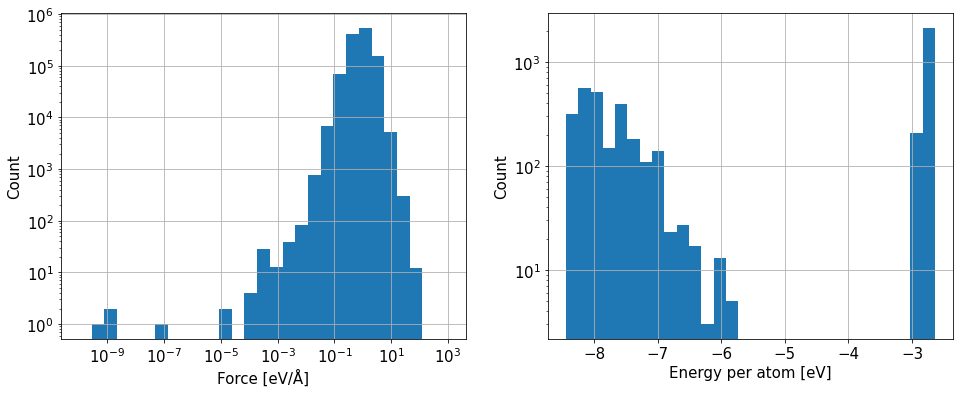

In [6]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(16, 6))

bins = np.logspace(-10,3,30)

ax0.hist(data_forces_magnitude, bins, log = True);
ax0.set_ylabel('Count');
ax0.set_xlabel('Force [eV/Å]')
ax0.set_xscale('log')
ax0.grid()

ax1.hist(data_energies, 30, log = True);
ax1.set_ylabel('Count');
ax1.set_xlabel('Energy per atom [eV]')
ax1.grid()

---
# BENCHMARKING AND HYPERPARAMETERS
---

### Split of data set:

Total number of data points (atoms objects): 4815

Data split:
 - frist 2861 for training,
 - next 954 for validation,
 - and final 1000 for testing.
 
### Baseline:
 
 - EMT? Not implemented for Ti.
 
 - Average force should be [0,0,0]$^T$, energy roughly 5-6 eV per atom. This is fairly easy to know where to relate this on the following plots...

In [7]:
# Creating Data_Set object which is the sub data set used for testing
test_data = Data_Set(data[-40:])

In [8]:
    species_to_type_name = {
        "Au": "Au",
        "Ti": "Ti",
        "O": "O"
    }

In [9]:
# Initializing Model_Interpreter object for all DS-models created
modle_names = ['P-r3','P-r4','P-r5','P-r6', 'P-r6-5','P-r8']

models = []
for modle_name in modle_names:
    
    new_calc = NequIPCalculator.from_deployed_model(
        model_path= 
        str("/home/niflheim/s173973/treeweek/" + modle_name + '.pth'),
    species_to_type_name = {
        "Au": "Au",
        "Ti": "Ti",
        "O": "O"
    },
    # energy_units_to_eV=0.043,
    #device='cpu'
    )
        
    models.append(Model_Interpreter(new_calc, test_data, modle_name, True))
    
#EMT_model = Model_Interpreter(EMT, test_data, 'EMT', True) # Was used for the EMT calculator...

/home/niflheim/s173973/treeweek/venv/lib/python3.8/site-packages/nequip/utils/_global_options.py:69: UserWarning: Setting the GLOBAL value for jit bailout depth to `2` which is different than the previous value of `20`
  warnings.warn(


*** Benchmarking model: P-r3 ******
atoms objects evaluated: 10 / 40
atoms objects evaluated: 20 / 40
atoms objects evaluated: 30 / 40
atoms objects evaluated: 40 / 40
Model P-r3 : !BENCHMARKED!
*********************************** 

*** Benchmarking model: P-r4 ******
atoms objects evaluated: 10 / 40
atoms objects evaluated: 20 / 40
atoms objects evaluated: 30 / 40
atoms objects evaluated: 40 / 40
Model P-r4 : !BENCHMARKED!
*********************************** 

*** Benchmarking model: P-r5 ******
atoms objects evaluated: 10 / 40
atoms objects evaluated: 20 / 40
atoms objects evaluated: 30 / 40
atoms objects evaluated: 40 / 40
Model P-r5 : !BENCHMARKED!
*********************************** 

*** Benchmarking model: P-r6 ******
atoms objects evaluated: 10 / 40
atoms objects evaluated: 20 / 40
atoms objects evaluated: 30 / 40
atoms objects evaluated: 40 / 40
Model P-r6 : !BENCHMARKED!
*********************************** 

*** Benchmarking model: P-r6-5 ******
atoms objects evaluated: 10 / 

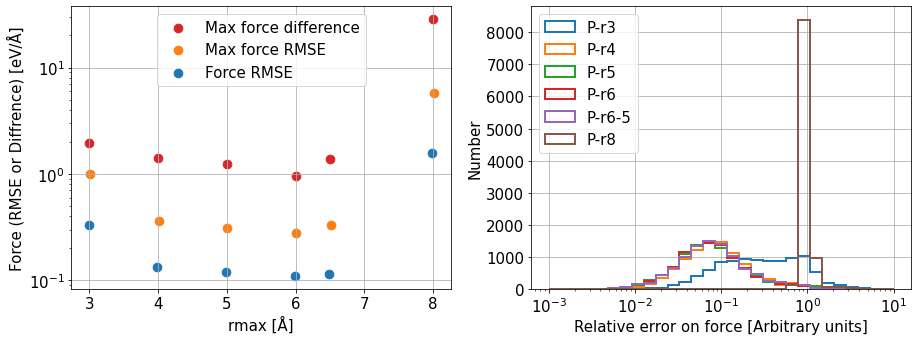

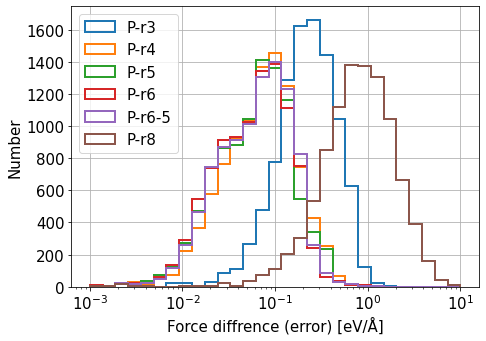

In [10]:


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13, 5))
#ax0.hist(data_forces_magnitude, log = True);
ax0.set_xlabel('rmax [Å]')
ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()


ax0.set_yscale('log')


# Histrogram (relative error)

bins = np.logspace(-3,1,30)


ax1.set_xlabel('Relative error on force [Arbitrary units]')
ax1.set_ylabel('Number');
ax1.set_xscale('log')   
ax1.grid()

rmax_lab = np.array([3,4,5,6,6.5,8])
i = 0
for model in models:
    
    if(i==0):
        ax0.scatter(rmax_lab[i], np.max(model.forces_diff_mag),
                    s = 75,color = 'tab:red', label = 'Max force difference')
        ax0.scatter(rmax_lab[i]+0.009, np.mean(model.max_forces_RMSE),
                   s = 75, color = 'tab:orange', label = 'Max force RMSE')
        ax0.scatter(rmax_lab[i]-0.009, np.mean(model.forces_RMSE), 
                    s = 75,color = 'tab:blue', label = 'Force RMSE')
        
    else:
        ax0.scatter(rmax_lab[i], np.max(model.forces_diff_mag),
                    s = 75,color = 'tab:red')
        ax0.scatter(rmax_lab[i]+0.009, np.mean(model.max_forces_RMSE),
                   s = 75, color = 'tab:orange')
        ax0.scatter(rmax_lab[i]-0.009, np.mean(model.forces_RMSE), 
                    s = 75,color = 'tab:blue')

    ax1.hist(model.forces_relative_err, bins, histtype='step', stacked=True, fill=False
             , label = model.name, linewidth=2)
    
    i = i + 1
    
ax0.legend(loc = 9);
ax1.legend(loc = 2);
fig.tight_layout()


# Lowest plot:

fig, ax0 = plt.subplots(1, 1, figsize=(7, 5))

ax0.set_xlabel('Force diffrence (error) [eV/Å]')
ax0.set_ylabel('Number');
ax0.set_xscale('log')   
ax0.grid()


for model in models:
    ax0.hist(model.forces_diff_mag, bins, histtype='step', stacked=True, fill=False
             , label = model.name, linewidth=2)
    
ax0.legend(loc = 2);
fig.tight_layout()

### A few things to note:

We need a fairly accurate estimate on both large and smaller forces i.e. forces on the scale of the convergence criteria (f_max) are as relevant to get right as large forces. Forces much lower than f_max are not as relavant.

- An error of 1 eV/Å on a large force may be acceptable, but not on a small force around 0.05 eV/Å (the initial convergence criteria on gpaw wiki)

- Relative error may also not be relevant for very small forces if they are negabul in regards to convergence.

Therefore, maybe some different scale of error for low and large forces is necessary? 

Mabye we can live with a large relative error on small forces (i.e. $10^{-9}$ eV/Å) and then only consern our selvs with the error on the larger forces. This may be above some sertan thresshold - say 0.01 eV/Å or similar?
This should probally be related to the error on the DFT computation it self, say 1/3 or 1/10 of that error?

Number above threshold: 9641
Number below threshold: 72
Ratio of these: (#below/#above) 0.007468104968364277


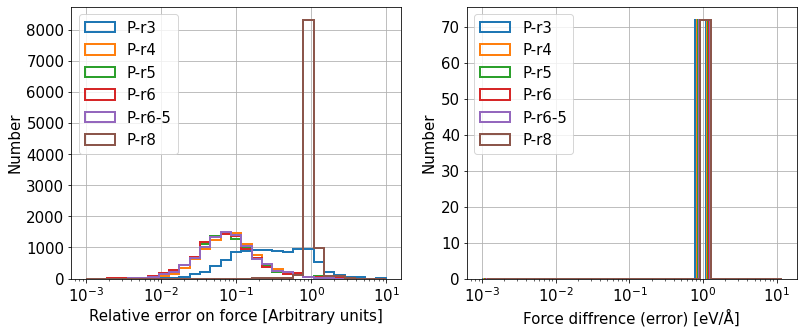

In [11]:
threshold = 0.01



fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13, 5))

j = 0
for model in models:
    
    ab_re_error = np.array([])
    be_re_error = np.array([])
    
    for i in range(len(model.data_set.forces)):
        force = model.data_set.forces[i,:]
        force_mag = np.linalg.norm(force)
        
        if(force_mag > threshold):
            ab_re_error = np.append(ab_re_error, model.forces_relative_err[i])
        else:
            be_re_error = np.append(be_re_error, model.forces_relative_err[i])
        
        i = i + 1
    
    bins = np.logspace(-3,1,30)
    
    ax0.hist(ab_re_error, bins, histtype='step', stacked=True, fill=False
             , label = model.name, linewidth=2)
    
    bins = bins + bins * j/30
    ax1.hist(be_re_error, bins, histtype='step', stacked=True, fill=False
             , label = model.name, linewidth=2)     
    j = j + 1

print('Number above threshold:', len(ab_re_error))
print('Number below threshold:', len(be_re_error))
print('Ratio of these: (#below/#above)', len(be_re_error)/len(ab_re_error))
    
ax0.set_xlabel('Relative error on force [Arbitrary units]')
ax0.set_ylabel('Number');
ax0.set_xscale('log')   
ax0.grid()
ax0.legend(loc = 2);


ax1.set_xlabel('Force diffrence (error) [eV/Å]')
ax1.set_ylabel('Number');
ax1.set_xscale('log')   
ax1.grid()
ax1.legend(loc = 2);


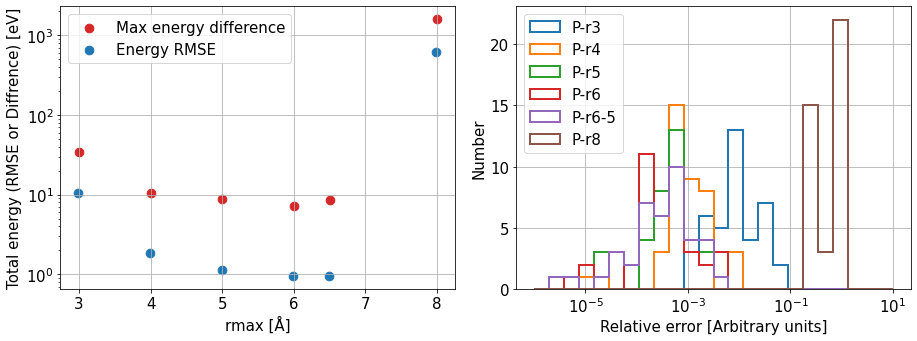

In [12]:

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13, 5))
#ax0.hist(data_forces_magnitude, log = True);
ax0.set_xlabel('rmax [Å]')
ax0.set_ylabel('Total energy (RMSE or Diffrence) [eV]');
ax0.grid()


ax0.set_yscale('log')


# Histrogram (relative error)

bins = np.logspace(-6,1,25)
alpha = np.linspace(0.4,1,len(models))
alpha = np.flip(alpha)


ax1.set_xlabel('Relative error [Arbitrary units]')
ax1.set_ylabel('Number');
ax1.set_xscale('log')   
ax1.grid()

rmax_lab = np.array([3,4,5,6,6.5,8])
i = 0
for model in models:
    
    if(i==0):
        ax0.scatter(rmax_lab[i], np.max(model.energies_diff),
                    s = 75,color = 'tab:red', label = 'Max energy difference')
        ax0.scatter(rmax_lab[i]-0.009, np.mean(model.energies_diff), 
                    s = 75,color = 'tab:blue', label = 'Energy RMSE')
        
    else:
        ax0.scatter(rmax_lab[i], np.max(model.energies_diff),
                    s = 75,color = 'tab:red')
        ax0.scatter(rmax_lab[i]-0.009, np.mean(model.energies_diff), 
                    s = 75,color = 'tab:blue')
    
    
    ax1.hist(np.abs(model.energies_diff/test_data.energies), bins, histtype='step', stacked=True, fill=False
             , label = model.name, linewidth=2)
    i = i + 1
    
ax0.legend();
ax1.legend(loc = 2);
fig.tight_layout()



P-r3 corrlation: 	 0.9999583916101047
P-r4 corrlation: 	 0.9999979309301535
P-r5 corrlation: 	 0.9999989574295052
P-r6 corrlation: 	 0.9999993430691182
P-r6-5 corrlation: 	 0.9999992158560806
P-r8 corrlation: 	 0.9529194869721624


(-9.0, -2.0)

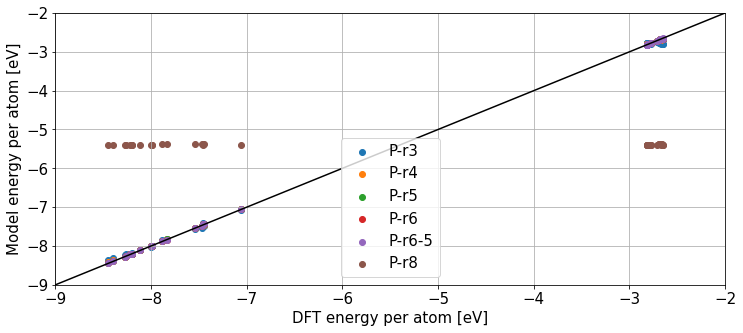

In [13]:
# parity plot:

fig, ax0 = plt.subplots(1, 1, figsize=(12, 5))
ax0.set_xlabel('DFT energy per atom [eV]');
ax0.set_ylabel('Model energy per atom [eV]')
ax0.grid()


#model = models[2]
for model in models:
    ax0.scatter(test_data.energies_avg, model.model_energies_avg, label = model.name)
    print(model.name, 'corrlation: \t',np.corrcoef(test_data.energies, model.model_energies)[1,0])

ax0.plot(-np.arange(8)-2,-np.arange(8)-2, color = 'black')
ax0.legend()
ax0.set_xlim(-9,-2)
ax0.set_ylim(-9,-2)

### loss functoin:

$$
L = \lambda_E ||\hat{E}-E||^2 +
\lambda_F \frac{1}{3N} \sum_{i=1}^N \sum_{\alpha = 1}^3
||
- \frac{\partial \hat{E}}{\partial r_{i, \alpha}} - F_{i, \alpha}
||^2
$$

$\lambda_E$ to $\lambda_F$ $\sim$ 1 to $N_{atoms}^2$

## ---  ---

In [14]:
calculator1= NequIPCalculator.from_deployed_model(
        model_path="/home/niflheim/s173973/treeweek/P-r3.pth",
    species_to_type_name = {
        "Au": "Au",
        "Ti": "Ti",
        "O": "O"
    },
    # energy_units_to_eV=0.043,
    device='cpu')

In [15]:
x = data[0].get_forces()

x = np.hstack((x,x))

df = pd.DataFrame(x)

df

,0,1,2,3,4,5
0,-1.32588,0.02562,1.12734,-1.32588,0.02562,1.12734
1,-0.89518,-0.18996,0.27727,-0.89518,-0.18996,0.27727
2,0.17700,-2.33215,1.94650,0.17700,-2.33215,1.94650
3,0.03455,1.57078,1.10777,0.03455,1.57078,1.10777
4,-0.04205,-0.25311,-0.82354,-0.04205,-0.25311,-0.82354
...,...,...,...,...,...,...
283,-0.64201,0.27986,0.86863,-0.64201,0.27986,0.86863
284,0.98066,-0.13507,2.43054,0.98066,-0.13507,2.43054
285,-0.52810,-0.06850,-0.51534,-0.52810,-0.06850,-0.51534
286,-0.23254,0.48289,0.37260,-0.23254,0.48289,0.37260


In [16]:



! ls

ase				P-r4.pth       __pycache__
Data_Set.py			P-r5.pth       test1
development_of_model_evaluator	P-r6-5.pth     Testing_Job.sh
Initial_Examples.ipynb		P-r6.pth       venv
Model_Interpreter.py		P-r8.pth
P-r3.pth			Project.ipynb


In [ ]:
import pandas as pd


D = pd.read_csv(r"/treeweek/test1/results/9potential/r6-5.5/metrics_epoch.csv")